In [31]:
import json
import os
from matplotlib import pyplot as plt

scene_graph_path = '../../scripts/outputs/scene_graphs/'

all_object_info = {}
min_object_info = {}
for scene_graph_file in os.listdir(scene_graph_path):
    
    scene_graph = json.load(open(os.path.join(scene_graph_path, scene_graph_file, 'scene_graph.json')))

    frame_level_object_info = {}
    for frame in scene_graph['frames']:
        for obj in frame['objects']:
            if obj['object_class'] not in frame_level_object_info:
                frame_level_object_info[obj['object_class']] = 1
            else:
                frame_level_object_info[obj['object_class']] += 1
    
    # Aggregate all object counts across scenes
    for obj_class in frame_level_object_info:
        if obj_class not in all_object_info:
            all_object_info[obj_class] = frame_level_object_info[obj_class]
        else:
            all_object_info[obj_class] += frame_level_object_info[obj_class]
     
    # Find the minimum available object per scene
    scene_sorted_object_info = sorted(frame_level_object_info.items(), key=lambda x: x[1])
    scene_min_object_info = scene_sorted_object_info[:1]
    for obj_class, count in scene_min_object_info:
        if obj_class not in min_object_info:
            min_object_info[obj_class] = [count, 1]
        else:
            min_object_info[obj_class][0] += count
            min_object_info[obj_class][1] += 1
            
print(f"Total object classes found: {len(all_object_info)}")
print(f"Total objects across all scenes: {sum(all_object_info.values())}")
    

Total object classes found: 23
Total objects across all scenes: 364746


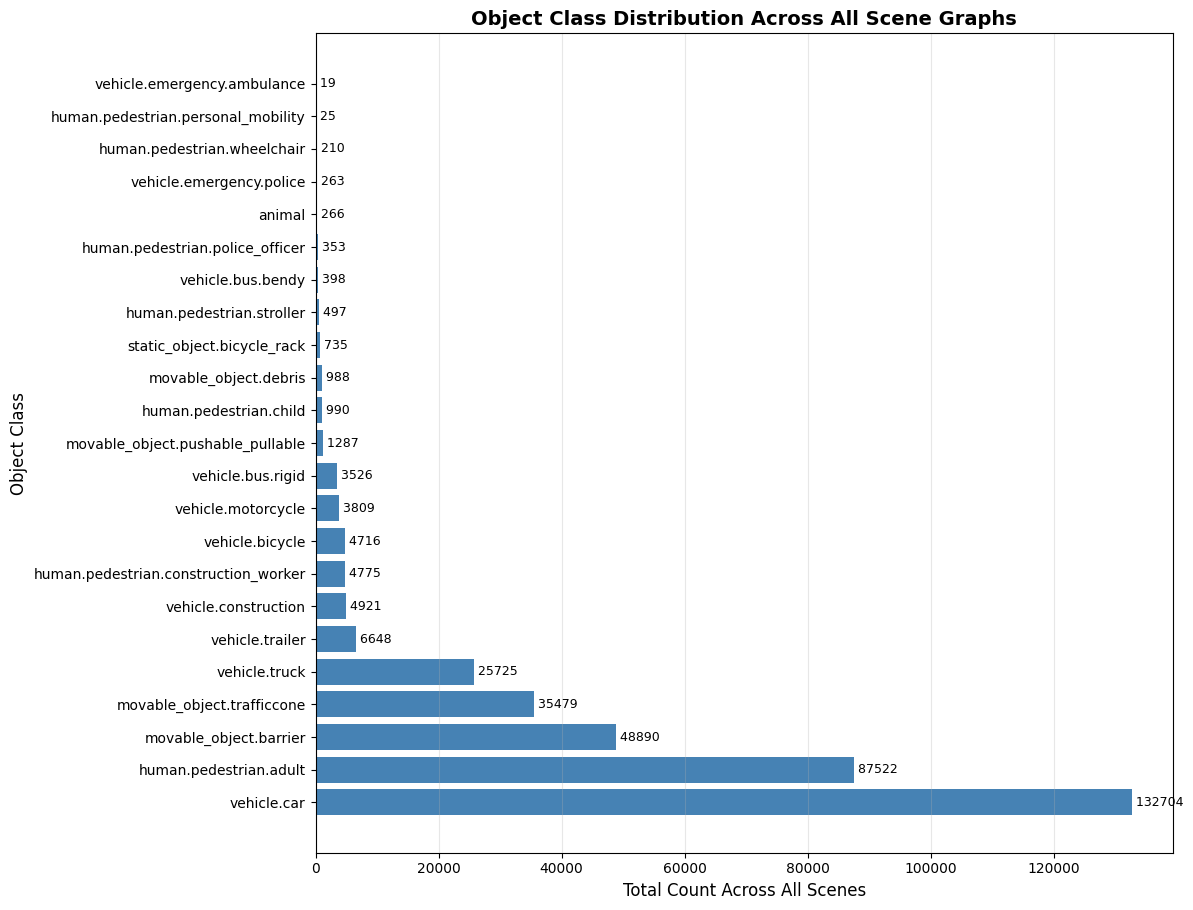

In [32]:
# Sort objects by count for better visualization
sorted_all_objects = sorted(all_object_info.items(), key=lambda x: x[1], reverse=True)

# Create a horizontal bar chart for all objects
fig, ax = plt.subplots(figsize=(12, max(8, len(sorted_all_objects) * 0.4)))
object_classes = [obj[0] for obj in sorted_all_objects]
counts = [obj[1] for obj in sorted_all_objects]

ax.barh(object_classes, counts, color='steelblue')
ax.set_xlabel('Total Count Across All Scenes', fontsize=12)
ax.set_ylabel('Object Class', fontsize=12)
ax.set_title('Object Class Distribution Across All Scene Graphs', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add count labels on the bars
for i, (obj_class, count) in enumerate(sorted_all_objects):
    ax.text(count, i, f' {count}', va='center', fontsize=9)

plt.tight_layout()
plt.show()


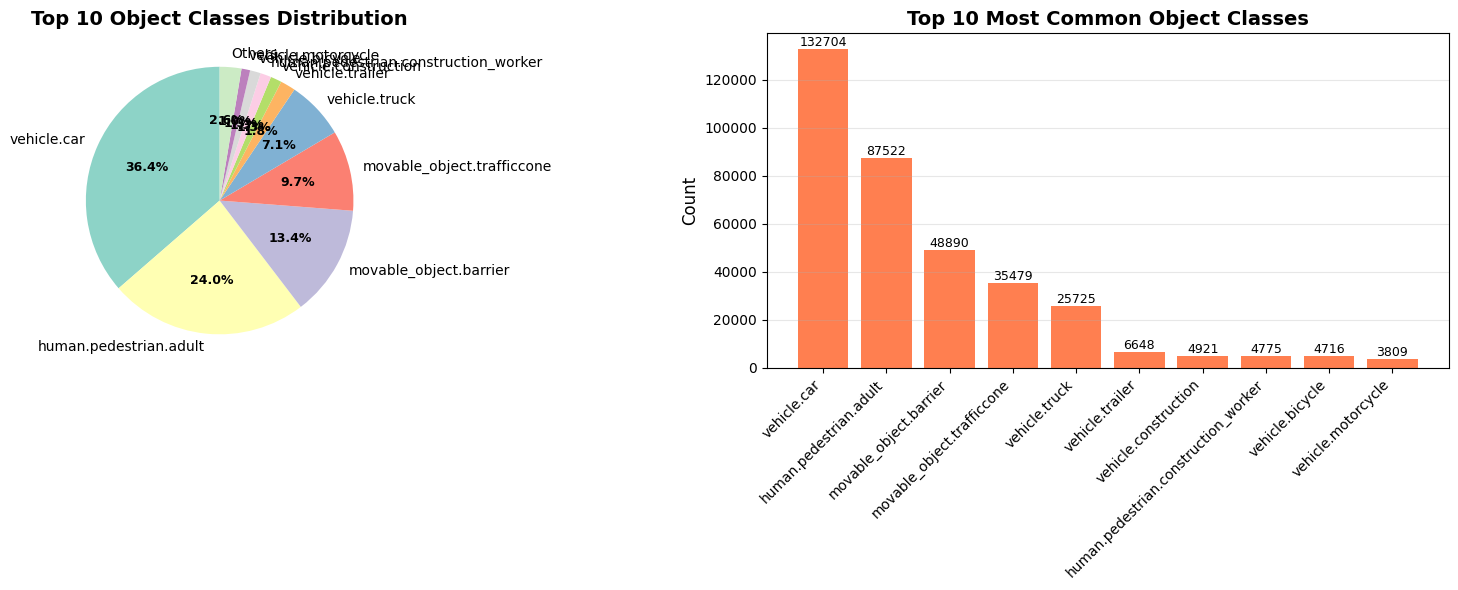

In [33]:

# Show top 10 most common objects with pie chart
top_n = min(10, len(sorted_all_objects))
top_objects = sorted_all_objects[:top_n]
top_classes = [obj[0] for obj in top_objects]
top_counts = [obj[1] for obj in top_objects]

# Add "Others" category if there are more objects
if len(sorted_all_objects) > top_n:
    others_count = sum([obj[1] for obj in sorted_all_objects[top_n:]])
    top_classes.append('Others')
    top_counts.append(others_count)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
colors = plt.cm.Set3(range(len(top_classes)))
wedges, texts, autotexts = ax1.pie(top_counts, labels=top_classes, autopct='%1.1f%%',
                                     colors=colors, startangle=90)
ax1.set_title(f'Top {top_n} Object Classes Distribution', fontsize=14, fontweight='bold')


# Make percentage text more readable
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

# Bar chart for top objects
ax2.bar(range(len(top_objects)), top_counts[:len(top_objects)], color='coral')
ax2.set_xticks(range(len(top_objects)))
ax2.set_xticklabels(top_classes[:len(top_objects)], rotation=45, ha='right')
ax2.set_ylabel('Count', fontsize=12)
ax2.set_title(f'Top {top_n} Most Common Object Classes', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, count in enumerate(top_counts[:len(top_objects)]):
    ax2.text(i, count, str(count), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


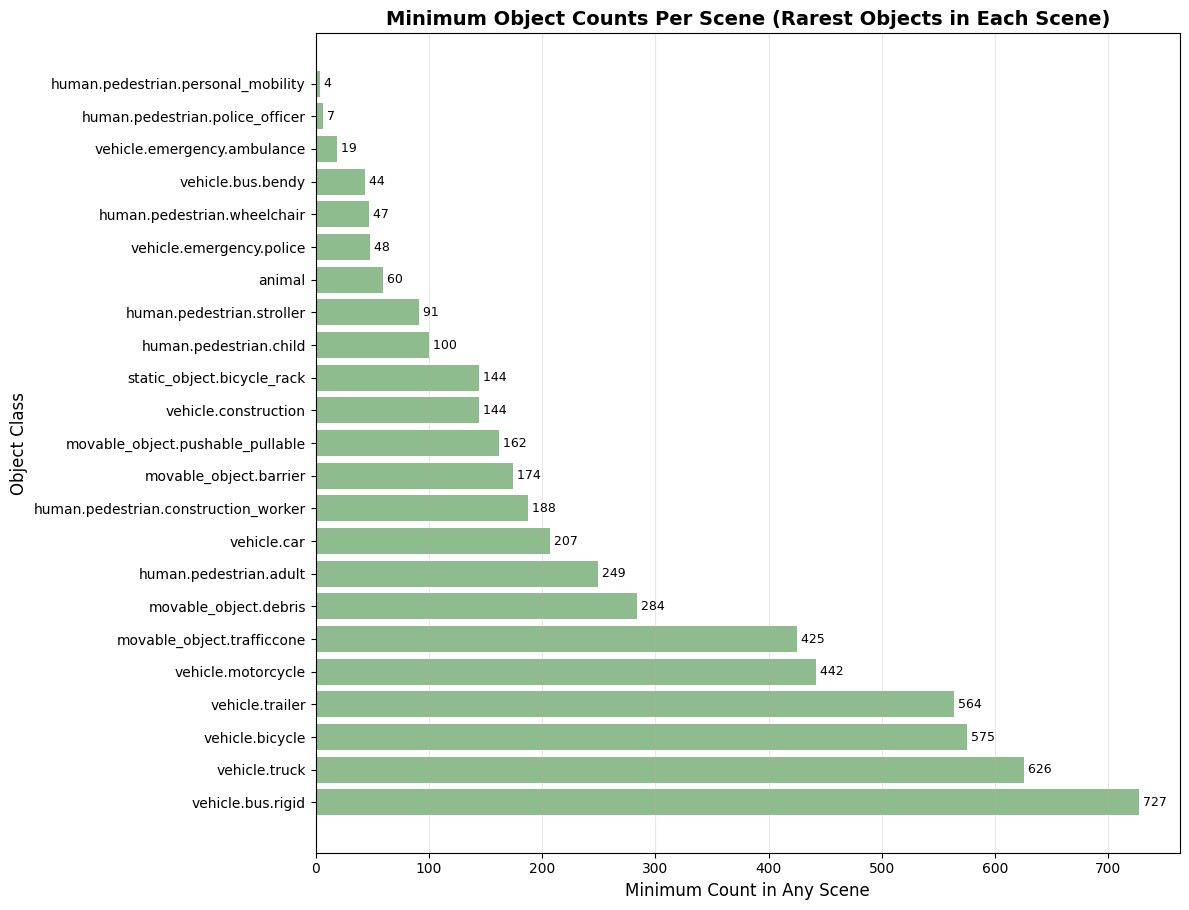

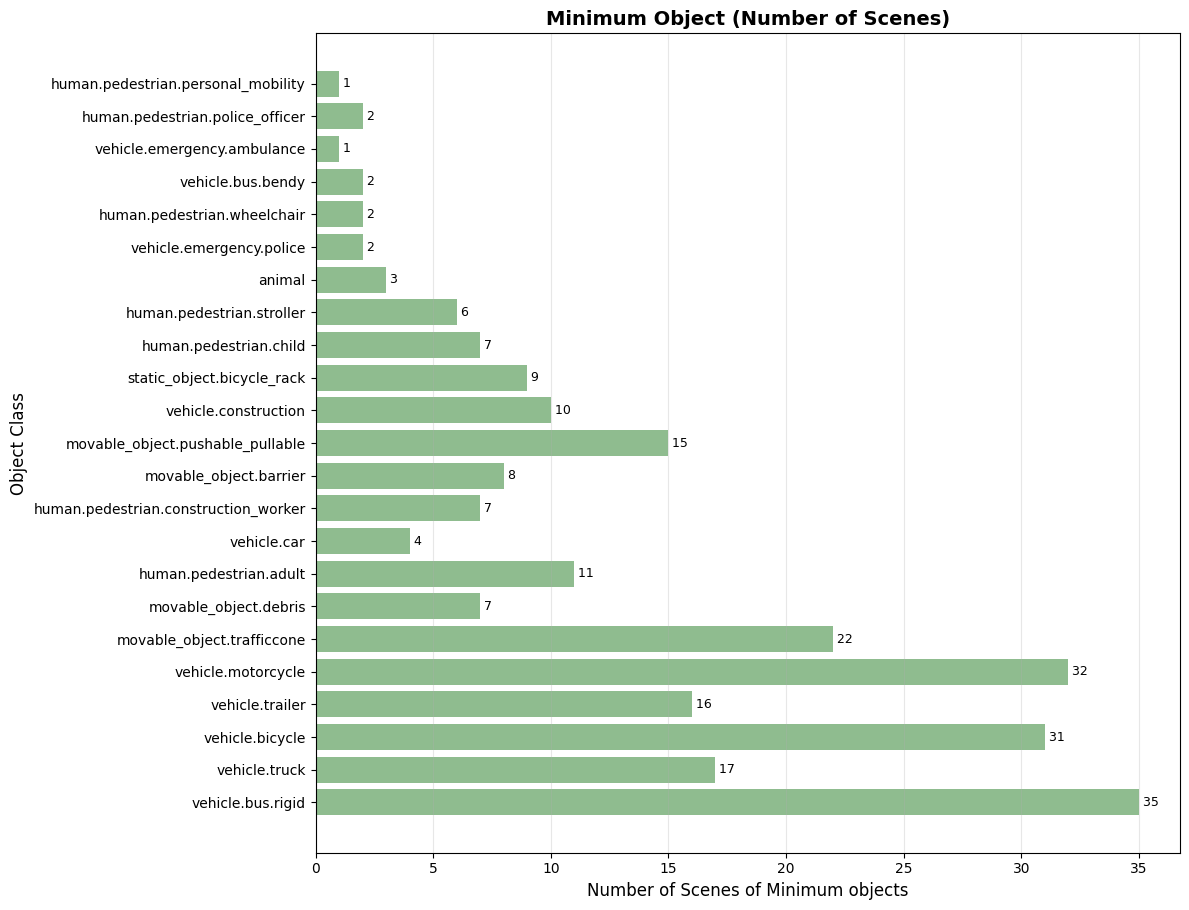

In [34]:
# Visualize minimum object counts per scene
if min_object_info:
    sorted_min_objects = sorted(min_object_info.items(), key=lambda x: x[1][0], reverse=True)
    
    fig, ax = plt.subplots(figsize=(12, max(6, len(sorted_min_objects) * 0.4)))
    min_classes = [obj[0] for obj in sorted_min_objects]
    min_counts = [obj[1][0] for obj in sorted_min_objects]
    min_scenes = [obj[1][1] for obj in sorted_min_objects]
    
    ax.barh(min_classes, min_counts, color='darkseagreen')
    ax.set_xlabel('Minimum Count in Any Scene', fontsize=12)
    ax.set_ylabel('Object Class', fontsize=12)
    ax.set_title('Minimum Object Counts Per Scene (Rarest Objects in Each Scene)', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Add count labels on the bars
    for i, (obj_class, count) in enumerate(sorted_min_objects):
        ax.text(count[0], i, f' {count[0]}', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    fig, ax = plt.subplots(figsize=(12, max(6, len(sorted_min_objects) * 0.4)))
    ax.barh(min_classes, min_scenes, color='darkseagreen')
    ax.set_xlabel('Number of Scenes of Minimum objects', fontsize=12)
    ax.set_ylabel('Object Class', fontsize=12)
    ax.set_title('Minimum Object (Number of Scenes)', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Add count labels on the bars
    for i, (obj_class, count) in enumerate(sorted_min_objects):
        ax.text(count[1], i, f' {count[1]}', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
else:
    print("No minimum object info available")


In [35]:
# Create a summary statistics table
import pandas as pd

summary_data = []
for obj_class in sorted(all_object_info.keys()):
    summary_data.append({
        'Object Class': obj_class,
        'Total Count': all_object_info[obj_class],
        'Min Count (per scene)': min_object_info.get(obj_class, 0)
    })

df = pd.DataFrame(summary_data)
df = df.sort_values('Total Count', ascending=False)

print("=" * 70)
print("OBJECT CLASS SUMMARY STATISTICS")
print("=" * 70)
print(df.to_string(index=False))
print("=" * 70)
print(f"\nTotal unique object classes: {len(all_object_info)}")
print(f"Total objects across all scenes: {sum(all_object_info.values())}")
print(f"Average objects per class: {sum(all_object_info.values()) / len(all_object_info):.2f}")


OBJECT CLASS SUMMARY STATISTICS
                        Object Class  Total Count Min Count (per scene)
                         vehicle.car       132704              [207, 4]
              human.pedestrian.adult        87522             [249, 11]
              movable_object.barrier        48890              [174, 8]
          movable_object.trafficcone        35479             [425, 22]
                       vehicle.truck        25725             [626, 17]
                     vehicle.trailer         6648             [564, 16]
                vehicle.construction         4921             [144, 10]
human.pedestrian.construction_worker         4775              [188, 7]
                     vehicle.bicycle         4716             [575, 31]
                  vehicle.motorcycle         3809             [442, 32]
                   vehicle.bus.rigid         3526             [727, 35]
    movable_object.pushable_pullable         1287             [162, 15]
              human.pedestrian.c